In [1]:
# import cv2 library
import cv2

In [2]:
# load pre-trained SSD model for face detection
model_weights = 'res10_300x300_ssd_iter_140000_fp16.caffemodel'
model_config = 'deploy.prototxt'

# load a pre-trained SSD model from the "face_det_dnn_ssd" folder: configuration file and weights.
# this model is capable of detecting faces in videos or images and displays the results in the form of bounding boxes.
net = cv2.dnn.readNetFromCaffe(model_config, model_weights)

# video file path
video_capture = cv2.VideoCapture(r'C:\.........\filename.mp4')

In [3]:
# with webcam
# video_capture = cv2.VideoCapture(0)

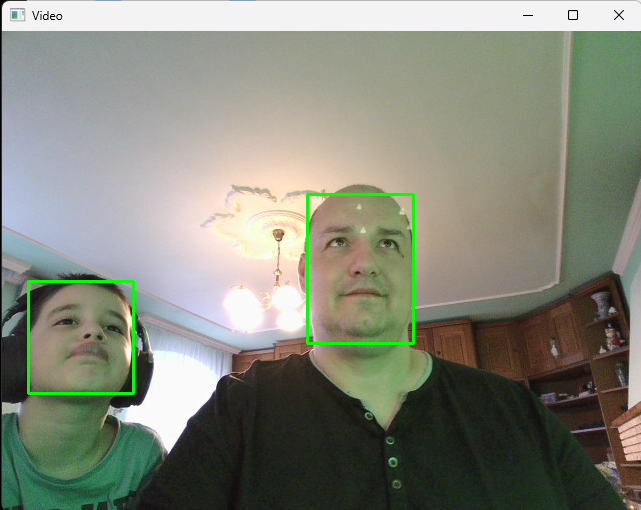

In [4]:
while True:
    # read frames
    ret, frame = video_capture.read()

    if not ret:
        break
    # prepare >> face detection
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Set the prepared input image
    net.setInput(blob)

    # face detection
    detections = net.forward()

    # loop over the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by confidence threshold
        if confidence > 0.5:
            # get coordinates for drawing the bounding box
            box = detections[0, 0, i, 3:7] * [frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]]
            (startX, startY, endX, endY) = box.astype(int)

            # draw a bounding box around the face
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # display the resulting frame with face detections
    cv2.imshow('Video', frame)

    # break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video capture object and close the display window
video_capture.release()
cv2.destroyAllWindows()